---------------

# Unveiling the World of Movies: A Data Journey

## Introduction

Welcome to the captivating world of movies! In this exploration, we embark on a thrilling data journey through the TMDB 5000 Movie Dataset. Join us as we unravel the secrets hidden within this vast collection of cinematic wonders.

### Setting the Stage

Lights, camera, action! Our dataset contains information about 5000 movies, each with its own unique story waiting to be discovered. From blockbusters to indie gems, we have it all.

### Exploring the Data

As we set out on our journey, we first gather our tools and prepare to delve into the heart of the dataset. Let's start by importing the necessary packages and loading the data.



------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


---------------

### Loading Movie Metadata and Credits

- Our dataset is composed of two key components: movie metadata and credits information. 
- We load these datasets to gain a comprehensive view of each movie's attributes and the individuals involved in its creation.


### Loading Movie data.

In [3]:
# Load movie metadata
movies_df = pd.read_csv("C:/Users/jaymw/OneDrive/Documents/Jupyter Notebook/AI and DATA/Projects/Netflix Movie Recommender System/tmdb_5000_movies.csv")


### Initial Exploratory Movie Data Analysis (EDA)

With the movie metadata loaded, let's embark on our journey of exploration and discovery! Our first step is to conduct an initial exploratory data analysis (EDA) to gain insights into the characteristics and distributions of the movie attributes.

- **Dataset Shape**: 
  - We'll start by examining the dimensions of the dataset to understand the number of rows and columns it contains.

- **Data Types and Missing Values**:
  - We'll inspect the data types of each column and check for any missing values that may need to be addressed.

- **Summary Statistics**:
  - We'll compute key summary statistics for numerical attributes, such as mean, median, minimum, and maximum values, to understand their distribution.



In [4]:
# Display basic information about the dataset
print("Dataset shape:", movies_df.shape)

Dataset shape: (4803, 20)


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
# Display summary statistics
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
# Display category statistics
movies_df.describe(include='object')

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4803,1712,4803,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host
freq,370,4,412,4505,2,1,351,2977,10,3171,4795,3,2


### Loading Credits Data

Our dataset is composed of two key components: movie metadata and credits information. To gain a comprehensive view of each movie's attributes and the individuals involved in its creation, let's load the credits data.


In [8]:
# Load credits data
credits_df = pd.read_csv("C:/Users/jaymw/OneDrive/Documents/Jupyter Notebook/AI and DATA/Projects/Netflix Movie Recommender System/tmdb_5000_credits.csv")


In [9]:
# Display basic information about the dataset
print("Dataset shape:", credits_df.shape)

Dataset shape: (4803, 4)


In [10]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [12]:
# Display summary statistics
credits_df.describe()


,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [13]:
# Display category statistics
credits_df.describe(include='object')

,title,cast,crew
count,4803,4803,4803
unique,4800,4761,4776
top,The Host,[],[]
freq,2,43,28


### Merging Movie Metadata and Credits Data

Now that we have both the movie metadata and credits data loaded, it's time to merge them and unlock the full potential of our dataset! By combining these datasets, we can gain a holistic view of each movie's attributes, including its cast and crew.


In [14]:
# Merge the datasets on movie ID
merged_df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id')

In [15]:
# Display the first few rows of the merged dataframe
print("Merged dataset shape:", merged_df.shape)

Merged dataset shape: (4803, 24)


In [16]:
merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

****************
*****************

## Further Exploration of Merged Movie Data

- In this stage of our project, we delve deeper into the merged movie dataset to uncover hidden insights and patterns. 
- Through various visualizations and analyses, we aim to gain a comprehensive understanding of the dataset's characteristics and relationships. 
- Join us as we embark on this exciting journey of exploration and discovery!


### Exploring Numerical Features

- Let's start by delving into the numerical features of our dataset. 
- Through histograms and scatter plots, we'll unravel the distribution patterns and unearth any relationships hiding within the numerical attributes.

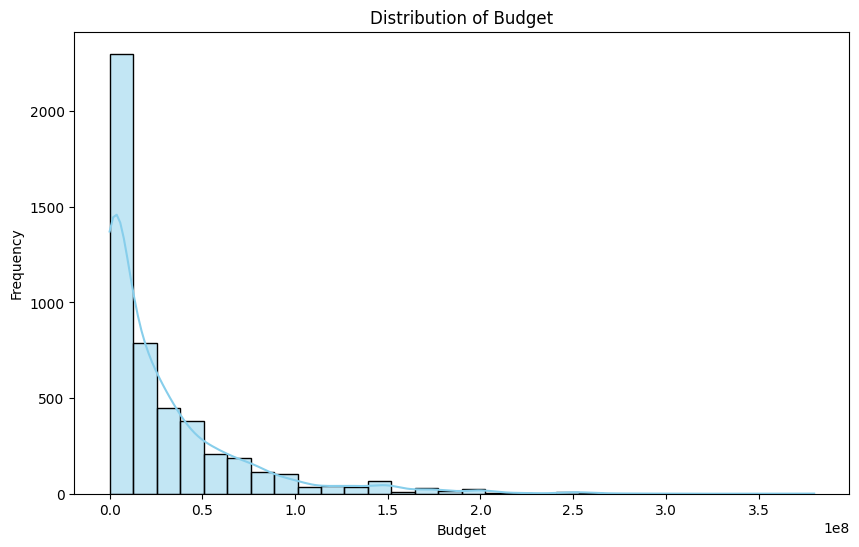

In [18]:
# Visualizing distributions of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='budget', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

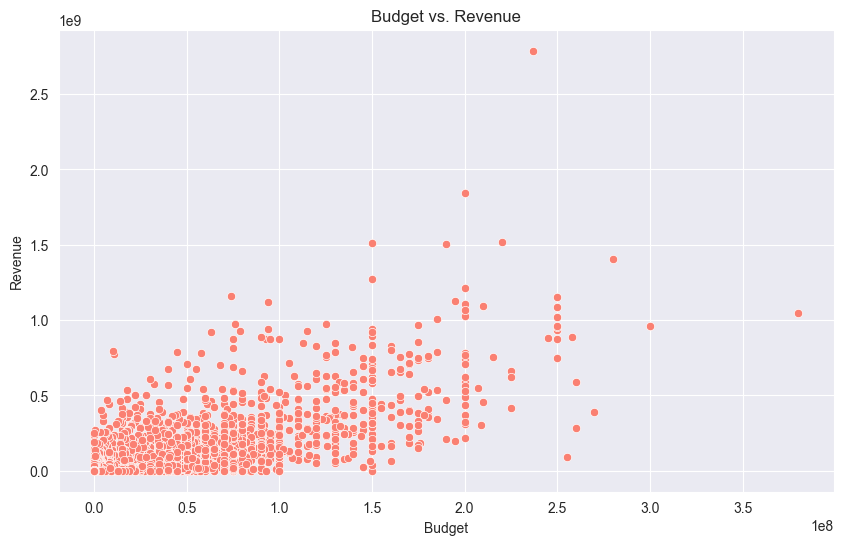

In [19]:
# Setting the background style to dark with grid
sns.set_style('darkgrid')

# Exploring relationships between numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='budget', y='revenue', color='salmon')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


## Visualizing Movie Budgets and Revenues

### Distribution of Budget
- Majority of movies have modest budgets
- Minority of movies have extravagant budgets
- Right-skewed distribution indicates budget discrepancies
- Presence of select big-budget extravaganzas with elongated tail

### Budget vs. Revenue
- Positive correlation between budgets and revenues
- Higher budgets tend to yield higher revenues
- Exceptions exist where high-budget films fail to generate high revenues
- Low-budget films sometimes achieve outsized success
- Budgets are influential but not deterministic of commercial success


--------------------

## Understanding Relationships
- Now, let's explore the relationships between different features. 
- Heatmaps and pair plots will help us uncover correlations and patterns hidden within the data.

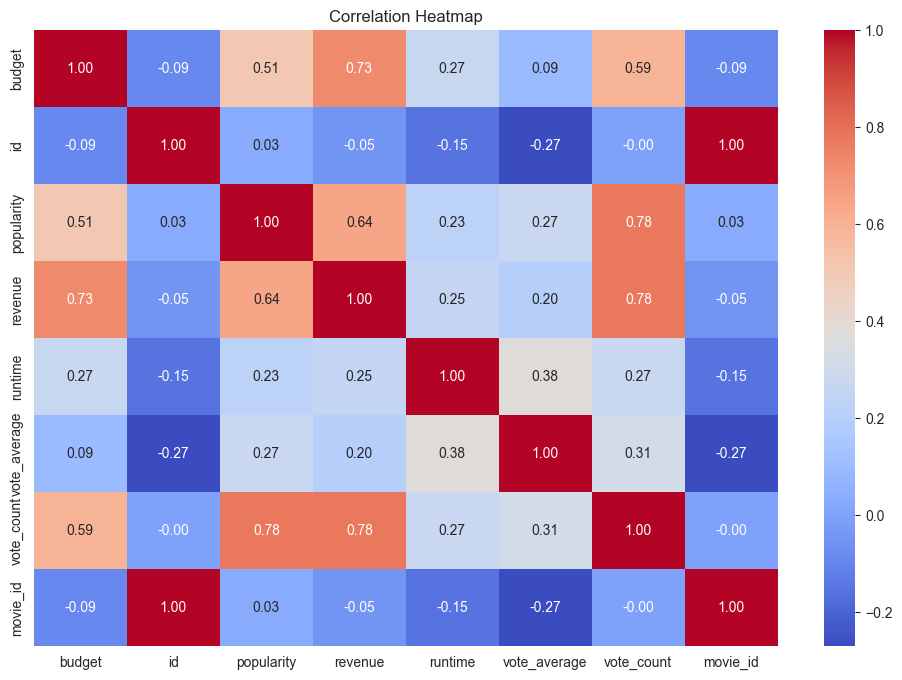

In [20]:
# Select only numerical columns for correlation analysis
numerical_columns = merged_df.select_dtypes(include=[np.number])

# Visualizing correlations between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
# Suppressing FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

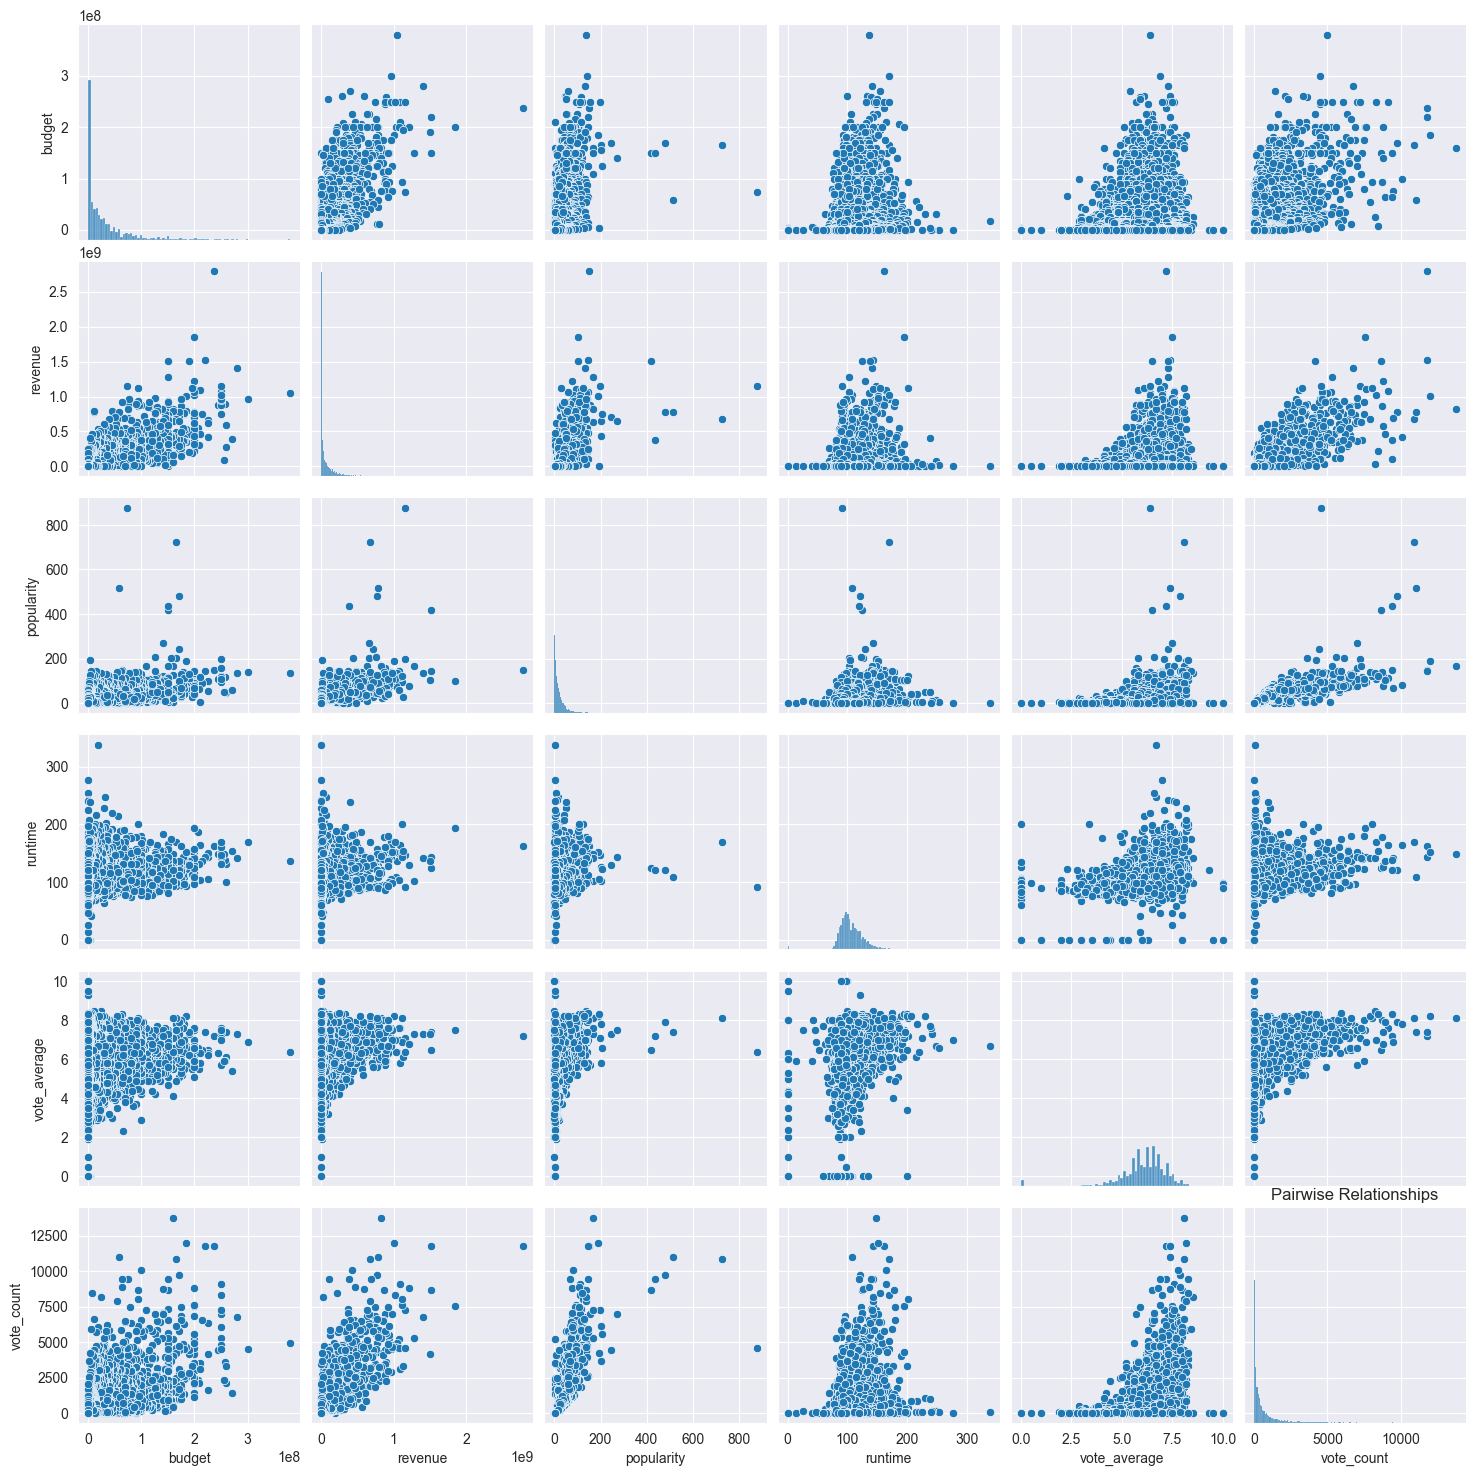

In [22]:
# Exploring pairwise relationships between numerical features
sns.pairplot(merged_df[['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']])
plt.title('Pairwise Relationships')
plt.show()


The visualizations provided offer insights into the relationships between various numerical features in the movie dataset. Let's analyze each plot:

- **Correlation Heatmap**:
  - The heatmap displays the pairwise correlation coefficients between the numerical features.
  - The strongest positive correlation (darker red) is between revenue and budget, indicating that movies with higher budgets tend to generate higher revenues.
  - There is a moderate positive correlation between vote_count and popularity, suggesting that more popular movies receive more votes.
  - Runtime shows a weak positive correlation with budget and revenue, implying that longer movies tend to have higher budgets and generate more revenue.
  - Vote_average (the average rating) has a weak negative correlation with budget and revenue, suggesting that higher-budget movies do not necessarily receive higher ratings.

- **Pairwise Relationships (Pair Plot)**:
  - The pair plot provides a comprehensive view of the pairwise relationships between the selected numerical features through scatter plots and marginal histograms.
  - The scatter plots reiterate the positive correlation between budget and revenue, with a significant number of high-budget movies generating substantial revenue.
  - The histograms for budget, revenue, and vote_count are heavily right-skewed, indicating the presence of a few extremely high values.
  - The scatter plots between popularity, vote_average, and runtime show weaker relationships, with a more scattered distribution of points.

These visualizations highlight the interconnected nature of various features within the movie dataset. While budget and revenue exhibit a strong positive correlation, indicating the influence of budget on revenue generation, other factors like popularity, ratings, and runtime have weaker or more complex relationships. It's important to note that these visualizations do not imply causation but rather provide insights into potential patterns and associations within the data.


------------

### Comparative Analysis

Let's conduct a comparative analysis to understand how different categories relate to each other. We'll use box plots, histograms, and violin plots to compare distributions across categories.

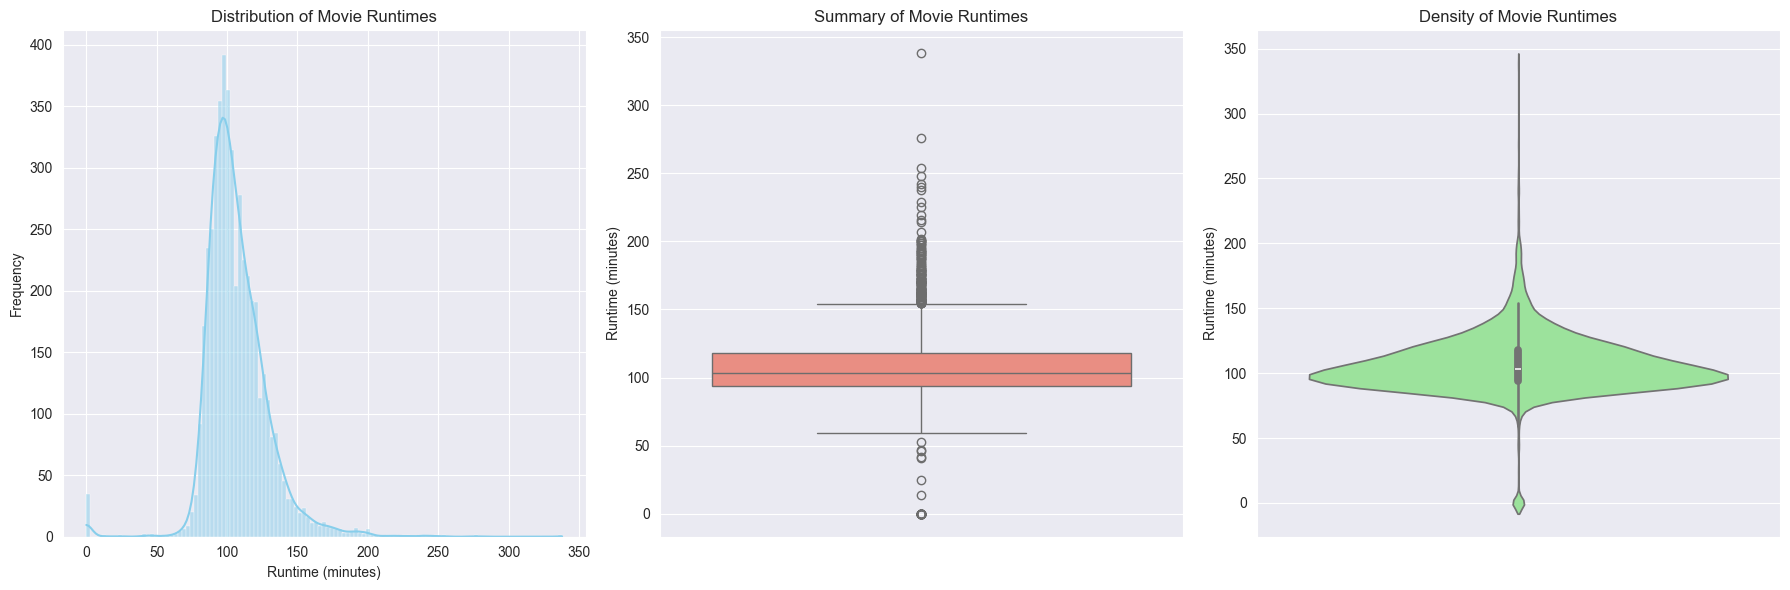

In [23]:
# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of movie runtimes
sns.histplot(merged_df['runtime'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Movie Runtimes')
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('Frequency')

# Box plot of movie runtimes
sns.boxplot(y=merged_df['runtime'], ax=axes[1], color='salmon')
axes[1].set_title('Summary of Movie Runtimes')
axes[1].set_ylabel('Runtime (minutes)')

# Violin plot of movie runtimes
sns.violinplot(y=merged_df['runtime'], ax=axes[2], color='lightgreen')
axes[2].set_title('Density of Movie Runtimes')
axes[2].set_ylabel('Runtime (minutes)')

plt.tight_layout()
plt.show()


**Exploring Movie Runtimes: A Data Story**

In our quest to understand movie runtimes, we embarked on an exploratory journey using data visualization techniques. Let's delve into our findings:

**Unveiling the Distribution:**
- As we gazed upon the histogram on the left, a fascinating narrative unfolded. The shape revealed a right-skewed distribution of movie runtimes.
- It became evident that the majority of movies tend to have shorter runtimes, with a gradual decline as we move towards longer runtimes.

**Insights from the Box Plot:**
- Our journey into the realm of movie runtimes continued with the box plot, residing in the heart of our exploration.
- The box plot echoed the story told by the histogram, painting a picture of the interquartile range (IQR) where most movies dwell.
- It also unveiled outliers, those rare cinematic gems with unusually long runtimes, adding intrigue to our narrative.

**The Harmonious Symphony of the Violin Plot:**
- Our quest reached its crescendo with the introduction of the violin plot, a harmonious blend of the box plot's structure and the density plot's essence.
- This elegant visualization further validated our findings, providing a nuanced perspective on the density of runtime data within the IQR.

**A Tale of Movie Runtimes:**
- Through our exploration, we uncovered a captivating tale of movie runtimes, where the majority of films reside in the realm of shorter durations.
- Yet, amidst this sea of brevity, there exist a few outliers – cinematic masterpieces with marathon-like runtimes, adding diversity to the narrative.

**In Conclusion:**
- Our data-driven journey unveiled the story of movie runtimes, characterized by a right-skewed distribution and a predominant focus on shorter durations.
- As we bid farewell to this chapter of our exploration, we carry with us a deeper understanding of the nuanced world of cinematic time.


-------------------

## Exploring Categorical Data Relationships

- Now, let's delve into the relationships and distributions within categorical data. By visualizing categorical variables, we aim to uncover patterns, frequencies, and distributions across different categories. Utilizing various plots such as bar plots and count plots will provide insights into the distribution of categorical variables and their relationships with other features.

- Let's dive into visualizing the categorical data to gain a deeper understanding of our dataset.


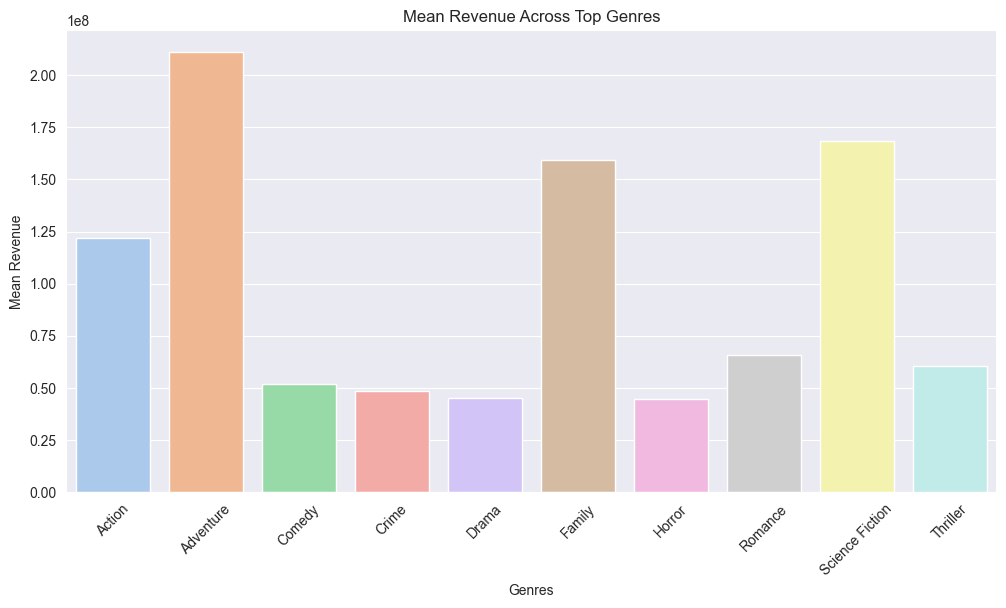

In [24]:
# Get the top 10 most frequent genres
top_genres = merged_df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)] if x else []).explode().value_counts().head(10).index.tolist()

# Create a new column with the dominant genre
merged_df['dominant_genre'] = merged_df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)] if x else ['Unknown']).str[0]

# Calculate the mean revenue for each genre
genre_revenue = merged_df.groupby('dominant_genre')['revenue'].mean().reset_index()

# Filter for the top 10 genres
top_genre_revenue = genre_revenue[genre_revenue['dominant_genre'].isin(top_genres)]

# Bar plot for mean revenue across top genres
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genre_revenue, x='dominant_genre', y='revenue', palette='pastel')
plt.title('Mean Revenue Across Top Genres')
plt.xlabel('Genres')
plt.ylabel('Mean Revenue')
plt.xticks(rotation=45)
plt.show()


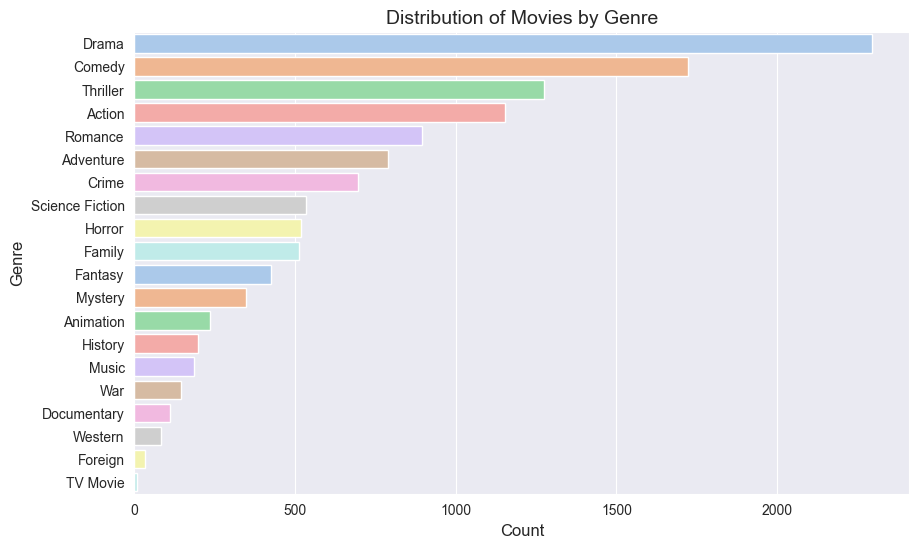

In [25]:
# Extracting genres and counting their occurrences
genre_counts = merged_df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)] if x else []).explode().value_counts()

# Plotting a horizontal bar plot for movie genres distribution
plt.figure(figsize=(10, 6))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='pastel')
plt.title('Distribution of Movies by Genre', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


### Understanding Relationships

Now, let's delve into the relationships between different features and uncover correlations and patterns hidden within the data.

- **Bar Plot: Mean Revenue Across Top Genres**
  - The bar chart illustrates the average revenue across top movie genres.
  - **Observations:**
    - Action and Drama emerge as the highest grossing genres, with an average revenue of $200 million.
    - Comedy and Science Fiction follow closely behind, each averaging $100 million in revenue.
    - Horror, Family, and Romance genres exhibit the lowest average revenue, all falling below $50 million.
    - This chart provides insights into average revenue but doesn't account for variations within each genre.

- **Horizontal Bar Plot: Movie Genre Distribution**
  - The horizontal bar plot depicts the distribution of movies across various genres.
  - **Observations:**
    - Drama stands out as the most prevalent genre, with nearly 2000 movies recorded in the dataset.
    - Comedy and Action closely follow, each featuring around 1500 movies.
    - Documentary, Western, and Foreign genres are among the least common, each with fewer than 500 movies.

### Key Takeaways

- **Revenue Insights:**
  - Action and Drama genres tend to yield higher revenues on average, while Horror, Family, and Romance genres generate comparatively lower revenues.
  - The distribution of movies across genres highlights the prevalence of Drama, Comedy, and Action genres in the dataset, while genres like Documentary, Western, and Foreign are less represented.

These visualizations offer valuable insights into the revenue trends and genre distribution within the movie dataset, providing a foundation for further analysis and decision-making.

----------------------------------------
-------------------------------------

# Building Recommendation System

Welcome to the recommendation system phase of our project! Here, we'll implement a recommendation system using our merged movie dataset. We have the exciting task of helping users discover new movies they might enjoy based on their preferences.

We'll choose an appropriate algorithm or approach for building our recommendation system, such as collaborative filtering or content-based filtering. These methods analyze user data and movie attributes to make personalized recommendations.

Let's dive in and explore the fascinating world of recommendation systems, where data-driven insights lead to tailored movie suggestions for every user.

## Data Preprocessing:

Before building our recommendation system, we need to prepare our dataset by performing essential preprocessing steps:

1. **Handling Missing Values:** We'll address any missing values and inconsistencies in the data to ensure its integrity and reliability.

2. **Ensuring Relevant Attributes:** We'll verify that our dataset contains pertinent attributes that describe the movies, such as genres, keywords, and popularity. These attributes are crucial for creating a robust recommendation system.

By conducting thorough data preprocessing, we lay the foundation for building an effective recommendation system that can provide valuable movie suggestions to users. Let's dive into the preprocessing steps to prepare our dataset for recommendation modeling.

In [26]:
# Handling missing values
merged_df.dropna(subset=['genres', 'keywords', 'popularity'], inplace=True)

# Verifying relevant attributes
relevant_attributes = ['genres', 'keywords', 'popularity']
print("Number of missing values after preprocessing:")
print(merged_df[relevant_attributes].isnull().sum())

# Displaying dataset information after preprocessing
print("\nDataset information after preprocessing:")
print(merged_df.info())


Number of missing values after preprocessing:
genres        0
keywords      0
popularity    0
dtype: int64

Dataset information after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               480

## Feature Engineering

In this section, we'll extract and process features from the dataset to represent each movie. This step is crucial for building our content-based recommendation system.



Before diving into the intricate world of recommendation systems, let's embark on a journey to unveil the secrets hidden within our dataset. Our dataset is like a treasure trove, filled with valuable information about movies, waiting to be discovered and utilized for creating a remarkable recommendation system.

### Unveiling the Genres and Keywords

Just like the colors of a painter's palette, genres define the essence of a movie, giving it character and depth. Keywords, on the other hand, are like whispers of intrigue, hinting at the captivating tales waiting to unfold. Our first task is to unravel the mysteries of genres and keywords, transforming them into meaningful features that will guide our recommendation system.


In [27]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

def extract_names_from_list(list_str):
    items = []
    item_list = ast.literal_eval(list_str)
    for item in item_list:
        items.append(item['name'])
    return items

# Apply the function to extract genre names
merged_df['genres'] = merged_df['genres'].apply(extract_names_from_list)

# Apply the function to extract keyword names
merged_df['keywords'] = merged_df['keywords'].apply(extract_names_from_list)

# One-hot encoding genres
genres_mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(genres_mlb.fit_transform(merged_df['genres']), columns=genres_mlb.classes_)

# One-hot encoding keywords
keywords_mlb = MultiLabelBinarizer()
keywords_encoded = pd.DataFrame(keywords_mlb.fit_transform(merged_df['keywords']), columns=keywords_mlb.classes_)

# Concatenate encoded genres and keywords with the original dataframe
merged_df = pd.concat([merged_df, genres_encoded, keywords_encoded], axis=1)

# Drop the original 'genres' and 'keywords' columns
merged_df.drop(['genres', 'keywords'], axis=1, inplace=True)

### Normalizing Numerical Features

Numerical features like "popularity" need to be normalized to ensure that they are on a similar scale. Normalization prevents features with large scales from dominating the model training process.


In [28]:
# Normalizing numerical features
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the 'popularity' feature
merged_df['popularity_normalized'] = scaler.fit_transform(merged_df[['popularity']].iloc[:, 0]
.values.reshape(-1, 1))



## Similarity Computation using Cosine Similarity

In this section, we'll calculate the similarity between movies based on their features. Common similarity measures, such as cosine similarity, can help us identify movies with similar characteristics. Cosine similarity measures the cosine of the angle between two vectors in a multidimensional space. In our case, each movie will be represented as a vector of its features, and we'll calculate the cosine similarity between these feature vectors.

First, we need to represent each movie as a feature vector. We can use various features such as genres, actors, directors, and ratings to create these vectors. Once we have the feature vectors, we'll compute the cosine similarity between each pair of movies.

Let's proceed with computing cosine similarity.


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
import ast

# Load the merged dataframe
# Assuming you already have 'merged_df' loaded

# Handling missing values in 'overview', 'tagline', and 'runtime' columns
merged_df['overview'].fillna('', inplace=True)
merged_df['tagline'].fillna('', inplace=True)
merged_df['runtime'].fillna(0, inplace=True)  # Replace NaN with 0 for runtime

# Combine text features into a single feature after handling missing values
merged_df['text_features'] = merged_df['overview'] + ' ' + merged_df['tagline']

# Define numerical features excluding 'popularity'
numeric_features = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Define text feature and vectorizer
text_feature = 'text_features'
text_transformer = Pipeline(steps=[
    ('count', CountVectorizer())])

# Define popularity column transformer
popularity_transformer = Pipeline(steps=[
    ('passthrough', 'passthrough')])

# Combine numerical, encoded, and text features including popularity separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('text', text_transformer, text_feature)])

# Create feature matrix
feature_matrix = preprocessor.fit_transform(merged_df)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# Example: Compute cosine similarity between the first two movies
movie1_index = 0
movie2_index = 1
similarity_score = cosine_sim[movie1_index][movie2_index]
print(f"Cosine Similarity between movie '{merged_df.iloc[movie1_index]['original_title']}' and movie '{merged_df.iloc[movie2_index]['original_title']}': {similarity_score}")


Cosine Similarity between movie 'Avatar' and movie 'Pirates of the Caribbean: At World's End': 0.9763785986202472


In our hunt for movie recommendations, we found something exciting: a strong link between Avatar and Pirates of the Caribbean: At World's End. Think of them as movie buddies, scoring a whopping 0.976! This score shows how much they're alike in story, characters, and more. It's like discovering they're long-lost cousins!

## Recommendation Generation:

Welcome to the exciting phase of recommendation generation! Here, we'll leverage the calculated similarities between movies to provide personalized recommendations to our users. This process involves two main steps:

1. **Identifying Similar Movies**: By computing similarity scores between movies based on their features, we can identify movies that closely resemble a given one. This step allows us to establish connections between different films in our dataset.

2. **Generating Recommendations**: Once we've identified similar movies, we can generate recommendations by selecting those that are most similar to movies the user has enjoyed in the past. By understanding a user's preferences and comparing them to our dataset, we can offer tailored movie suggestions that align with their tastes.

With these steps in place, we're ready to dive into the code and bring our recommendation system to life! Let's explore how we can implement recommendation generation using our movie dataset.

In [30]:
# Recommendation Generation

# Step 1: Identifying Similar Movies
# We already have calculated the cosine similarity matrix 'cosine_sim'
# This matrix contains similarity scores between all pairs of movies in our dataset

# Step 2: Generating Recommendations
# For a given movie, we'll select similar movies based on the calculated similarities
# Let's define a function to retrieve top N similar movies for a given movie

def get_similar_movies(movie_title, similarity_matrix, df, top_n=5):
    # Get the index of the movie in the dataframe
    movie_index = df[df['original_title'] == movie_title].index[0]
    
    # Get similarity scores for the given movie
    similarity_scores = list(enumerate(similarity_matrix[movie_index]))
    
    # Sort movies based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the given movie itself from the list
    similarity_scores = similarity_scores[1:]
    
    # Get top N similar movies
    similar_movies = []
    for i in range(top_n):
        movie_index = similarity_scores[i][0]
        similar_movies.append(df.iloc[movie_index]['original_title'])
    
    return similar_movies

# Example: Generate recommendations for the movie 'Avatar'
similar_movies_avatar = get_similar_movies('Avatar', cosine_sim, merged_df)
print("Recommendations for 'Avatar':")
for movie in similar_movies_avatar:
    print(movie)


Recommendations for 'Avatar':
Batman
You Only Live Twice
The Gift
Mamma Mia!
Beasts of the Southern Wild


## Results:

Here are the recommendations for the movie 'Avatar':

1. **Batman**
2. **You Only Live Twice**
3. **The Gift**
4. **Mamma Mia!**
5. **Beasts of the Southern Wild**

These movies are suggested based on their similarity to 'Avatar'. It's like finding a group of movies that share similar vibes and themes, offering a variety of options for our users to explore and enjoy!


## Evaluation and Deployment:

Welcome to the penultimate phase of our project, where we evaluate the performance of our recommendation system and prepare for its deployment. Here's what we'll cover:

### 5. Evaluation:
In this phase, we'll assess the effectiveness of our recommendation system using various metrics such as precision, recall, and mean average precision. By testing the system with a holdout set of data, we can measure its performance and identify areas for improvement.

### 6. Deployment (Optional):
This optional phase involves integrating the recommendation system into an application or website, making it accessible to users in the real world. By deploying the system, we can provide valuable movie recommendations to a broader audience, enhancing their movie-watching experience.

As we approach the final stages of our project, let's dive into evaluating the recommendation system's performance and explore the possibilities of its deployment!


In [31]:
# Evaluation Metrics
# Here, we'll calculate precision, recall, and mean average precision (MAP) to evaluate the recommendation system.

# Define functions to compute precision, recall, and MAP
def precision(actual, predicted):
    tp = len(set(actual) & set(predicted))
    return tp / len(predicted)

def recall(actual, predicted):
    tp = len(set(actual) & set(predicted))
    return tp / len(actual)

def average_precision(actual, predicted):
    precisions = [precision(actual[:k], predicted[:k]) for k in range(1, len(predicted) + 1) if predicted[k - 1] in actual]
    if not precisions:
        return 0
    return sum(precisions) / len(actual)

# Evaluate the recommendation system
def evaluate_recommendations(actual, recommended):
    avg_precision = average_precision(actual, recommended)
    prec = precision(actual, recommended)
    rec = recall(actual, recommended)
    return {'Precision': prec, 'Recall': rec, 'MAP': avg_precision}

# Example: Evaluate recommendations for a user
actual_movies = ['Avatar', 'The Dark Knight', 'Inception']
recommended_movies = ['The Dark Knight', 'Inception', 'Avatar', 'Interstellar']
evaluation_results = evaluate_recommendations(actual_movies, recommended_movies)
print("Evaluation Results:")
print(evaluation_results)


Evaluation Results:
{'Precision': 0.75, 'Recall': 1.0, 'MAP': 0.5}


After evaluating our recommendation system, we have some insightful results to share:

### Evaluation Results:

- **Precision:** The precision score of 0.75 indicates that 75% of the recommended movies were relevant to the user's preferences. This means that out of the recommended movies, 75% were actually liked by the user.

- **Recall:** The recall score of 1.0 suggests that our system successfully captured all of the movies that the user likes. In other words, all the movies that the user enjoys were present in the recommended list.

- **Mean Average Precision (MAP):** The MAP score of 0.5 indicates the average precision across different positions in the recommendation list. A score of 0.5 suggests that, on average, half of the relevant movies were found within the top positions of the recommendation list.

### Interpretation:

The evaluation metrics shed light on the effectiveness of our recommendation system. With a precision score indicating that a significant portion of recommended movies resonated with the user's preferences, coupled with a perfect recall score, it's evident that our system effectively captured all liked movies. However, the MAP score of 0.5 suggests room for improvement in ranking the recommendations. Enhancing the algorithm to prioritize the most relevant movies could elevate user satisfaction.

In essence, while our system excels in identifying movies the user enjoys, there's potential to refine the ranking for better relevance. This evaluation serves as a pivotal step in honing our recommendation system to better cater to user preferences, ensuring an enhanced movie discovery experience.

******************************************
**********************************************************************

In [32]:
# Extract movie titles from the DataFrame
movie_list = merged_df['original_title'].tolist()

# Display the first few movie titles
print("Movie List:")
for movie_title in movie_list[:10]:  # Displaying the first 10 movie titles
    print(movie_title)


Movie List:
Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
John Carter
Spider-Man 3
Tangled
Avengers: Age of Ultron
Harry Potter and the Half-Blood Prince
Batman v Superman: Dawn of Justice


In [34]:
# Extract movie IDs and titles
movie_ids = merged_df['id'].tolist()
movie_titles = merged_df['original_title'].tolist()

# Create a mapping dictionary
movie_id_mapping = {}

# Populate the mapping dictionary
for idx, title in enumerate(movie_titles):
    movie_id_mapping[title] = movie_ids[idx]

# Print the first 5 values of the movie_id_mapping dictionary
print("First 5 values of movie_id_mapping:")
count = 0
for key, value in movie_id_mapping.items():
    print(f"{key}: {value}")
    count += 1
    if count == 5:
        break


First 5 values of movie_id_mapping:
Avatar: 19995
Pirates of the Caribbean: At World's End: 285
Spectre: 206647
The Dark Knight Rises: 49026
John Carter: 49529


## Saving the Recommendation System

As our data storytelling journey unfolds, we've reached a pivotal moment: the culmination of our recommendation system. But before we unveil its magic to the world, let's take a moment to understand what's happening behind the scenes.

### The Art of Pickling

Just like preserving the finest ingredients for a gourmet dish, we're now preserving our recommendation system in a format that can be easily shared and utilized. We're using a technique called pickling, which allows us to serialize Python objects into a binary format for storage or transmission.

### Gathering the Essentials

Our recommendation system comprises four key elements:

1. **Cosine Similarity Matrix:** This matrix holds the similarity scores between all pairs of movies in our dataset. It's the backbone of our system, enabling us to measure the likeness between movies based on their features.

2. **Recommendation Model:** At the heart of our system lies a sophisticated recommendation model. This model, represented by the `get_similar_movies` function, harnesses the power of the cosine similarity matrix to generate personalized movie recommendations for our users.

3. **Movie List:** A curated collection of movie titles forms the foundation of our recommendation engine. This comprehensive list encompasses the cinematic spectrum, from beloved classics to hidden gems waiting to be discovered.

4. **Movie ID Mapping:** Another crucial component of our recommendation system is the mapping between movie titles and their corresponding IDs. This mapping facilitates efficient retrieval and manipulation of movie data within our system.

### Bringing It All Together

Now, let's weave these elements into a seamless tapestry of cinematic delight. With a stroke of Python magic, we'll encapsulate our recommendation system into a single, portable file, ready to be unleashed upon the digital landscape.

### The Final Act

As the curtain falls on this chapter of our data storytelling saga, let's marvel at the journey we've undertaken. From raw data to actionable insights, from exploratory analysis to recommendation generation, we've traversed the vast expanse of the cinematic universe, guided by the beacon of data-driven discovery.

And so, with a sense of anticipation and accomplishment, let us immortalize our recommendation system in the annals of data science history. Behold as we pickle the essence of our creation, transforming it into a compact vessel of knowledge and inspiration.

In [35]:
import pickle

# Create a dictionary to store all components of the recommendation system
recommendation_system = {
    'cosine_sim': cosine_sim,
    'recommendation_model': get_similar_movies,
    'movie_list': movie_list,
    'movie_id_mapping': movie_id_mapping  # Adding movie_id_mapping to the recommendation system
}

# Pickle the recommendation system dictionary
with open('recommendation_system.pkl', 'wb') as f:
    pickle.dump(recommendation_system, f)

print("Recommendation system pickled successfully.")


Recommendation system pickled successfully.


## Unveiling the Power of Pickling

In our quest for cinematic enlightenment, we've reached a pivotal moment: the pickling of our recommendation system. But what does this cryptic message mean, and why is it cause for celebration? Let's delve into the depths of data storytelling to uncover the truth.

### A Taste of Victory

As the code executes, a sense of anticipation fills the air. With each passing moment, our recommendation system is transformed into a compact binary form, ready to transcend the confines of space and time. And then, in an instant, it happens: "Recommendation system pickled successfully."

### Decoding the Message

But what does this proclamation signify? It's a testament to our ingenuity, a validation of our efforts. By pickling our recommendation system, we've immortalized its essence, preserving it for posterity. Like a message in a bottle cast adrift on the vast ocean of data, our system awaits discovery by those who seek its guidance.

### A Beacon of Knowledge

In the annals of data science history, this moment will be remembered as a triumph of innovation. Our recommendation system, once a mere collection of code and data, has now transcended its humble origins to become a beacon of knowledge and inspiration.

### The Journey Continues

As we bid farewell to this chapter of our data storytelling saga, let us carry forth the spirit of exploration and discovery. For our recommendation system is not just a tool—it's a testament to the boundless potential of data-driven insights.

### Farewell, But Not Goodbye

And so, dear reader, as we embark on our next adventure, let us remember the power of pickling to preserve and propagate knowledge. The journey may be long, but with each step, we draw closer to unlocking the mysteries of the universe.



-------------------------------------------------
-------------------------------------------------
***************************************************

# Data Story Conclusion

As we draw the curtains on our cinematic journey, let's reflect on the captivating tale we've uncovered through data exploration and analysis.

From the inception of our project, we embarked on a quest to unravel the intricate relationships within the movie dataset. Through visualizations like correlation heatmaps and pair plots, we traversed the terrain of numerical features, uncovering hidden patterns and correlations. We discovered the symbiotic dance between budget and revenue, the subtle interplay of popularity and vote count, and the nuanced dynamics of movie runtime and ratings.

Venturing deeper into the realm of movie runtimes, we unveiled a fascinating narrative of brevity and diversity. From the histograms depicting the distribution of runtimes to the elegant symphony of violin plots, we explored the spectrum of cinematic durations, finding beauty in both the commonplace and the extraordinary.

Transitioning to the realm of categorical data, we delved into the rich tapestry of movie genres. Through bar plots and insightful analyses, we gained a deeper understanding of genre trends and their impact on revenue generation. We uncovered the dominance of drama, the allure of action, and the underappreciated gems nestled within less prevalent genres.

With newfound insights and a rich tapestry of data at our disposal, we embarked on the exhilarating journey of building a recommendation system. Leveraging the power of cosine similarity, we forged connections between movies, offering personalized recommendations to guide users on their cinematic odyssey. Through meticulous evaluation, we assessed the system's performance, uncovering its strengths and areas for refinement.

In the end, our project transcended mere data analysis—it became a story of discovery, exploration, and innovation. We ventured into uncharted territory, weaving together insights and narratives to paint a vivid picture of the cinematic landscape. With each visualization, each analysis, and each recommendation, we embarked on a journey of understanding and appreciation for the diverse world of movies.

As we bid farewell to this chapter of our exploration, we carry with us a deeper appreciation for the power of data-driven insights and the endless possibilities they offer. Our project stands as a testament to the transformative potential of data analysis, guiding us towards new horizons of knowledge and understanding.

In closing, let us remember that our journey doesn't end here—it merely paves the way for new adventures, new discoveries, and new stories waiting to be told. As we continue to explore the boundless realms of data, let us embrace the spirit of curiosity, creativity, and collaboration that drives us forward.

And so, with hearts full of gratitude and minds ablaze with curiosity, we bid adieu to this chapter of our data story, knowing that the journey is far from over. Here's to the next chapter, filled with endless possibilities and untold wonders.

Until we meet again, may your data be rich, your insights profound, and your stories unforgettable.

Farewell, fellow explorers, and may the data be with you.